系统学习一下 Meta分析的 R 语言实现，先前尝试使用了 RevMan 和 Stata，Revman 的操作简单但是缺少很多重要功能，Stata 功能丰富，但是学习的文档比较少，权衡之下，我还是选择学习 R 语言实现Meta 分析。

# 计算效益值

## 准备工作

In [ ]:
install.packages("tidyverse") # 为了使用 glimpse 函数

also installing the dependencies 'rematch', 'blob', 'DBI', 'gargle', 'cellranger', 'ids', 'rematch2', 'timechange', 'selectr', 'conflicted', 'dbplyr', 'dtplyr', 'googledrive', 'googlesheets4', 'httr', 'lubridate', 'readxl', 'reprex', 'rvest'




file 'DESCRIPTION' has the wrong MD5 checksum

The downloaded binary packages are in
	/var/folders/fv/c0dh9y6s7638rh5fdr3lgcmr0000gn/T//RtmpxnWFtU/downloaded_packages


Warning message:
"package 'demetar' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


In [1]:
# 当前版本无法安装 dmatar 包，直接从 github 上下载了ThirdWave 数据
# 读取rda文件
load("dmatar_data/ThirdWave.rda")

In [2]:
library(tidyverse)
glimpse(ThirdWave)

── Attaching core tidyverse packages ──────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the ]8;;http://conflicted.r-lib.org/conflicted package]8;; to force all conflicts to become errors
Rows: 18
Columns: 8
$ Author               <chr> "Call et al.", "Cavanagh et al.",…
$ TE                   <dbl> 0.7091362, 0.3548641, 1.7911700, …
$ seTE                 <dbl> 0.2608202, 0.1963624, 0.3455692, …
$ RiskOfBias           <chr> "high", "low", "high", "low", "lo…
$ TypeControlGroup     <chr> "WLC", "WLC", "WLC", "no interven…
$ InterventionDuration <chr> "short", "short", "short", "short…
$ InterventionType     <chr> "mindfulness", "mindfulness", "AC…
$ ModeOfDelivery       <chr> "gro

In [38]:
head(ThirdWave)

,Author,TE,seTE,RiskOfBias,TypeControlGroup,InterventionDuration,InterventionType,ModeOfDelivery
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Call et al.,0.7091362,0.2608202,high,WLC,short,mindfulness,group
2,Cavanagh et al.,0.3548641,0.1963624,low,WLC,short,mindfulness,online
3,DanitzOrsillo,1.7911700,0.3455692,high,WLC,short,ACT,group
4,de Vibe et al.,0.1824552,0.1177874,low,no intervention,short,mindfulness,group
5,Frazier et al.,0.4218509,0.1448128,low,information only,short,PCI,online
6,Frogeli et al.,0.6300000,0.1960000,low,no intervention,short,ACT,group


## 预先计算效益值

In [3]:
library(meta)
m.gen <- metagen( # nolint
  TE = TE,
  seTE = seTE,
  studlab = Author, # 设置研究的标签
  data = ThirdWave,
  sm = "SMD", # 设置效应量的类型
  common = FALSE,
  random = TRUE,
  method.tau = "REML",
  method.random.ci = TRUE,
  title = "ThirdWave"
)

Loading required package: metadat
Loading 'meta' package (version 8.0-2).
Type 'help(meta)' for a brief overview.


In [4]:
summary(m.gen)

Review:     ThirdWave

                          SMD            95%-CI %W(random)
Call et al.            0.7091 [ 0.1979; 1.2203]        5.0
Cavanagh et al.        0.3549 [-0.0300; 0.7397]        6.3
DanitzOrsillo          1.7912 [ 1.1139; 2.4685]        3.8
de Vibe et al.         0.1825 [-0.0484; 0.4133]        7.9
Frazier et al.         0.4219 [ 0.1380; 0.7057]        7.3
Frogeli et al.         0.6300 [ 0.2458; 1.0142]        6.3
Gallego et al.         0.7249 [ 0.2846; 1.1652]        5.7
Hazlett-Stevens & Oren 0.5287 [ 0.1162; 0.9412]        6.0
Hintz et al.           0.2840 [-0.0453; 0.6133]        6.9
Kang et al.            1.2751 [ 0.6142; 1.9360]        3.9
Kuhlmann et al.        0.1036 [-0.2781; 0.4853]        6.3
Lever Taylor et al.    0.3884 [-0.0639; 0.8407]        5.6
Phang et al.           0.5407 [ 0.0619; 1.0196]        5.3
Rasanen et al.         0.4262 [-0.0794; 0.9317]        5.1
Ratanasiripong         0.5154 [-0.1731; 1.2039]        3.7
Shapiro et al.         1.4797 [ 0

In [5]:
m.gen$TE.random

[1] 0.5771158

In [6]:
m.gen$tau2

[1] 0.08198549

## 结果调整

已经完成了 Meta分析，需要调整一些参数，可以用下面的方法：

In [7]:
m.gen_update <- update(m.gen, method.tau = "PM") # nolint
summary(m.gen_update)

Review:     ThirdWave

                          SMD            95%-CI %W(random)
Call et al.            0.7091 [ 0.1979; 1.2203]        5.2
Cavanagh et al.        0.3549 [-0.0300; 0.7397]        6.2
DanitzOrsillo          1.7912 [ 1.1139; 2.4685]        4.0
de Vibe et al.         0.1825 [-0.0484; 0.4133]        7.4
Frazier et al.         0.4219 [ 0.1380; 0.7057]        7.0
Frogeli et al.         0.6300 [ 0.2458; 1.0142]        6.2
Gallego et al.         0.7249 [ 0.2846; 1.1652]        5.7
Hazlett-Stevens & Oren 0.5287 [ 0.1162; 0.9412]        5.9
Hintz et al.           0.2840 [-0.0453; 0.6133]        6.6
Kang et al.            1.2751 [ 0.6142; 1.9360]        4.1
Kuhlmann et al.        0.1036 [-0.2781; 0.4853]        6.2
Lever Taylor et al.    0.3884 [-0.0639; 0.8407]        5.6
Phang et al.           0.5407 [ 0.0619; 1.0196]        5.4
Rasanen et al.         0.4262 [-0.0794; 0.9317]        5.2
Ratanasiripong         0.5154 [-0.1731; 1.2039]        3.9
Shapiro et al.         1.4797 [ 0

In [19]:
m.gen_update$TE.random

[1] 0.5873544

In [22]:
m.gen_update$tau2

[1] 0.1104957

## 标准化均值差

In [25]:
# 又要用到 dmatar 包，但是无法安装，直接从 github 上下载了 SuicidePrevention 数据
# 读取rda文件
load("dmatar_data/SuicidePrevention.rda")

In [26]:
head(SuicidePrevention)

,author,n.e,mean.e,sd.e,n.c,mean.c,sd.c,pubyear,age_group,control
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1,Berry et al.,90,14.98,3.29,95,15.54,4.41,2006,gen,WLC
2,DeVries et al.,77,16.21,5.35,69,20.13,7.43,2019,older,no intervention
3,Fleming et al.,30,3.01,0.87,30,3.13,1.23,2006,gen,no intervention
4,Hunt & Burke,64,19.32,6.41,65,20.22,7.62,2011,gen,WLC
5,McCarthy et al.,50,4.54,2.75,50,5.61,2.66,1997,gen,WLC
6,Meijer et al.,109,15.11,4.63,111,16.46,5.39,2000,gen,no intervention


In [48]:
SuicidePrevention$mean.e - SuicidePrevention$mean.c

[1] -0.56 -3.92 -0.12 -0.90 -1.07 -1.35  0.02 -0.28 -1.17

先用随机效应模型试一下。

In [29]:
library(meta)

m.cont <- metacont( # nolint
  # 输入数据
  n.e = n.e,
  mean.e = mean.e,
  sd.e = sd.e,
  n.c = n.c,
  mean.c = mean.c,
  sd.c = sd.c,
  studlab = author,
  data = SuicidePrevention,

  # 设置效应量的类型
  sm = "SMD",
  method.smd = "Hedges",

  # 设置模型
  common = FALSE,
  random = TRUE,
  method.tau = "REML",
  method.random.ci = TRUE,
  title = "Suicide Prevention"
)

In [30]:
summary(m.cont)

Review:     Suicide Prevention

                    SMD             95%-CI %W(random)
Berry et al.    -0.1428 [-0.4315;  0.1459]       15.6
DeVries et al.  -0.6077 [-0.9402; -0.2752]       12.3
Fleming et al.  -0.1112 [-0.6177;  0.3953]        5.7
Hunt & Burke    -0.1270 [-0.4725;  0.2185]       11.5
McCarthy et al. -0.3925 [-0.7884;  0.0034]        9.0
Meijer et al.   -0.2676 [-0.5331; -0.0021]       17.9
Rivera et al.    0.0124 [-0.3454;  0.3703]       10.8
Watkins et al.  -0.2448 [-0.6848;  0.1952]        7.4
Zaytsev et al.  -0.1265 [-0.5062;  0.2533]        9.7

Number of studies: k = 9
Number of observations: o = 1147 (o.e = 571, o.c = 576)

                         SMD             95%-CI     t p-value
Random effects model -0.2304 [-0.3734; -0.0874] -3.71  0.0059

Quantifying heterogeneity (with 95%-CIs):
 tau^2 = 0.0044 [0.0000; 0.0924]; tau = 0.0661 [0.0000; 0.3040]
 I^2 = 7.4% [0.0%; 67.4%]; H = 1.04 [1.00; 1.75]

Test of heterogeneity:
    Q d.f. p-value
 8.64    8  0.3738

De

再试一下固定效应模型。

In [31]:
library(meta)

m.cont <- metacont( # nolint
  # 输入数据
  n.e = n.e,
  mean.e = mean.e,
  sd.e = sd.e,
  n.c = n.c,
  mean.c = mean.c,
  sd.c = sd.c,
  studlab = author,
  data = SuicidePrevention,

  # 设置效应量的类型
  sm = "SMD",
  method.smd = "Hedges",

  # 设置模型
  common = TRUE,
  random = FALSE,
  method.tau = "REML",
  method.random.ci = TRUE,
  title = "Suicide Prevention"
)

In [32]:
summary(m.cont)

Review:     Suicide Prevention

                    SMD             95%-CI %W(common)
Berry et al.    -0.1428 [-0.4315;  0.1459]       16.3
DeVries et al.  -0.6077 [-0.9402; -0.2752]       12.3
Fleming et al.  -0.1112 [-0.6177;  0.3953]        5.3
Hunt & Burke    -0.1270 [-0.4725;  0.2185]       11.4
McCarthy et al. -0.3925 [-0.7884;  0.0034]        8.6
Meijer et al.   -0.2676 [-0.5331; -0.0021]       19.2
Rivera et al.    0.0124 [-0.3454;  0.3703]       10.6
Watkins et al.  -0.2448 [-0.6848;  0.1952]        7.0
Zaytsev et al.  -0.1265 [-0.5062;  0.2533]        9.4

Number of studies: k = 9
Number of observations: o = 1147 (o.e = 571, o.c = 576)

                        SMD             95%-CI     z  p-value
Common effect model -0.2311 [-0.3475; -0.1147] -3.89 < 0.0001

Quantifying heterogeneity (with 95%-CIs):
 tau^2 = 0.0044 [0.0000; 0.0924]; tau = 0.0661 [0.0000; 0.3040]
 I^2 = 7.4% [0.0%; 67.4%]; H = 1.04 [1.00; 1.75]

Test of heterogeneity:
    Q d.f. p-value
 8.64    8  0.3738

De

前面用的都是 SMD，这里用一下 MD 试试看。

In [46]:
library(meta)

m.cont <- metacont( # nolint
  # 输入数据
  n.e = n.e,
  mean.e = mean.e,
  sd.e = sd.e,
  n.c = n.c,
  mean.c = mean.c,
  sd.c = sd.c,
  studlab = author,
  data = SuicidePrevention,

  # 设置效应量的类型
  sm = "MD",
  method.smd = "Hedges",

  # 设置模型
  common = FALSE,
  random = TRUE,
  method.tau = "REML",
  method.random.ci = TRUE,
  title = "Suicide Prevention"
)

In [47]:
summary(m.cont)

Review:     Suicide Prevention

                     MD             95%-CI %W(random)
Berry et al.    -0.5600 [-1.6773;  0.5573]       11.4
DeVries et al.  -3.9200 [-6.0416; -1.7984]        4.9
Fleming et al.  -0.1200 [-0.6591;  0.4191]       18.7
Hunt & Burke    -0.9000 [-3.3285;  1.5285]        4.0
McCarthy et al. -1.0700 [-2.1305; -0.0095]       12.0
Meijer et al.   -1.3500 [-2.6770; -0.0230]        9.5
Rivera et al.    0.0200 [-0.5527;  0.5927]       18.2
Watkins et al.  -0.2800 [-0.7764;  0.2164]       19.2
Zaytsev et al.  -1.1700 [-4.5947;  2.2547]        2.2

Number of studies: k = 9
Number of observations: o = 1147 (o.e = 571, o.c = 576)

                          MD            95%-CI     t p-value
Random effects model -0.6467 [-1.3591; 0.0658] -2.09  0.0697

Quantifying heterogeneity (with 95%-CIs):
 tau^2 = 0.3175 [0.0044; 4.2610]; tau = 0.5635 [0.0662; 2.0642]
 I^2 = 54.9% [4.7%; 78.7%]; H = 1.49 [1.02; 2.17]

Test of heterogeneity:
     Q d.f. p-value
 17.76    8  0.0231

D

##  二分类变量

### 风险和优势比

In [40]:
# 又要用到 dmatar 包，但是无法安装，直接从 github 上下载了 DepressionMortality 数据
# 读取rda文件
load("dmatar_data/DepressionMortality.rda")

In [52]:
head(DepressionMortality)

,author,event.e,n.e,event.c,n.c,country
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,"Aaroma et al., 1994",25,215,171,3088,Finland
2,"Black et al., 1998",65,588,120,1901,USA
3,"Bruce et al., 1989",5,46,107,2479,USA
4,"Bruce et al., 1994",26,67,1168,3493,USA
5,"Enzell et al., 1984",32,407,269,6256,Sweden
6,"Fredman et al., 1989",1,44,87,1520,USA


In [44]:
help(metabin)

metabin                  package:meta                  R Documentation

_M_e_t_a-_a_n_a_l_y_s_i_s _o_f _b_i_n_a_r_y _o_u_t_c_o_m_e _d_a_t_a

_D_e_s_c_r_i_p_t_i_o_n:

     Calculation of common effect and random effects estimates (risk
     ratio, odds ratio, risk difference, arcsine difference, or
     diagnostic odds ratio) for meta-analyses with binary outcome data.
     Mantel-Haenszel, inverse variance, Peto method, generalised linear
     mixed model (GLMM), logistic regression with penalised likelihood
     and sample size method are available for pooling. For GLMMs, the
     'rma.glmm' function from R package *metafor* (Viechtbauer, 2010)
     is called internally. For penalised logistic regression, R package
     *brglm2* must be available.

_U_s_a_g_e:

     metabin(
       event.e,
       n.e,
       event.c,
       n.c,
       studlab,
       data = NULL,
       subset = NULL,
       exclude = NULL,
       cluster = NULL,
      

In [55]:
library(meta)

m_bin <- metabin(
  # 输入数据
  event.e = event.e,
  n.e = n.e,
  event.c = event.c,
  n.c = n.c,
  studlab = author,
  data = DepressionMortality,

  # 设置效益值
  sm = "RR",
  method = "MH",
  MH.exact = TRUE,

  # 设置模型
  common = FALSE,
  random = TRUE,
  method.tau = "PM",
  method.random.ci = TRUE,
  title = "Depression and Mortality"
)

In [56]:
summary(m_bin)

Review:     Depression and Mortality

                          RR            95%-CI %W(random)
Aaroma et al., 1994   2.0998 [1.4128;  3.1208]        6.0
Black et al., 1998    1.7512 [1.3139;  2.3341]        6.6
Bruce et al., 1989    2.5183 [1.0785;  5.8802]        3.7
Bruce et al., 1994    1.1605 [0.8560;  1.5733]        6.5
Enzell et al., 1984   1.8285 [1.2853;  2.6014]        6.3
Fredman et al., 1989  0.3971 [0.0566;  2.7861]        1.2
Murphy et al., 1987   1.7640 [1.2644;  2.4610]        6.4
Penninx et al., 1999  1.4647 [0.9361;  2.2919]        5.8
Pulska et al., 1998   1.9436 [1.3441;  2.8107]        6.2
Roberts et al., 1990  2.3010 [1.9206;  2.7567]        7.0
Saz et al., 1999      2.1837 [1.5533;  3.0700]        6.3
Sharma et al., 1998   2.0500 [1.0744;  3.9114]        4.7
Takeida et al., 1997  6.9784 [4.1303; 11.7902]        5.3
Takeida et al., 1999  5.8124 [3.8816;  8.7035]        6.0
Thomas et al., 1992   1.3303 [0.7780;  2.2745]        5.3
Thomas et al., 1992   1.7722 [1.10

In [57]:
m_bin$TE.random

[1] 0.7039595

由结果可知，RR=2.02（P<0.001),表明抑郁会使死亡风险增加一倍。tau方=0.19，置信区间不包含0，所以研究存在较大的异质性。由于前面提过，PM法可能对tau方估计会产生较大的影响，所以，这次使用REML法。

In [60]:
m_bin_update <- update(
  m_bin,
  method.tau = "REML"
)

In [61]:
summary(m_bin_update)

Review:     Depression and Mortality

                          RR            95%-CI %W(random)
Aaroma et al., 1994   2.0998 [1.4128;  3.1208]        6.1
Black et al., 1998    1.7512 [1.3139;  2.3341]        6.7
Bruce et al., 1989    2.5183 [1.0785;  5.8802]        3.5
Bruce et al., 1994    1.1605 [0.8560;  1.5733]        6.6
Enzell et al., 1984   1.8285 [1.2853;  2.6014]        6.3
Fredman et al., 1989  0.3971 [0.0566;  2.7861]        1.1
Murphy et al., 1987   1.7640 [1.2644;  2.4610]        6.4
Penninx et al., 1999  1.4647 [0.9361;  2.2919]        5.7
Pulska et al., 1998   1.9436 [1.3441;  2.8107]        6.2
Roberts et al., 1990  2.3010 [1.9206;  2.7567]        7.2
Saz et al., 1999      2.1837 [1.5533;  3.0700]        6.4
Sharma et al., 1998   2.0500 [1.0744;  3.9114]        4.6
Takeida et al., 1997  6.9784 [4.1303; 11.7902]        5.3
Takeida et al., 1999  5.8124 [3.8816;  8.7035]        6.0
Thomas et al., 1992   1.3303 [0.7780;  2.2745]        5.2
Thomas et al., 1992   1.7722 [1.10

虽然结果有些许差异，但是还没到推翻结论的地步。如果我们需要汇报OR，与其重写函数，不如直接在原函数上更改参数。

In [62]:
m_bin_or <- update(
  m_bin,
  sm = "OR"
)

In [63]:
summary(m_bin_or)

Review:     Depression and Mortality

                          OR            95%-CI %W(random)
Aaroma et al., 1994   2.2445 [1.4389;  3.5011]        6.3
Black et al., 1998    1.8446 [1.3432;  2.5331]        7.0
Bruce et al., 1989    2.7034 [1.0472;  6.9793]        3.7
Bruce et al., 1994    1.2623 [0.7684;  2.0737]        6.0
Enzell et al., 1984   1.8992 [1.2974;  2.7802]        6.7
Fredman et al., 1989  0.3831 [0.0521;  2.8146]        1.3
Murphy et al., 1987   2.2733 [1.3248;  3.9011]        5.8
Penninx et al., 1999  1.6163 [0.8944;  2.9208]        5.5
Pulska et al., 1998   2.9547 [1.4041;  6.2177]        4.7
Roberts et al., 1990  2.5683 [2.0855;  3.1629]        7.5
Saz et al., 1999      2.8278 [1.7510;  4.5666]        6.1
Sharma et al., 1998   2.5949 [1.1555;  5.8275]        4.3
Takeida et al., 1997  7.7354 [4.4252; 13.5219]        5.7
Takeida et al., 1999  6.7101 [4.3351; 10.3862]        6.4
Thomas et al., 1992   1.3555 [0.7623;  2.4104]        5.6
Thomas et al., 1992   1.8472 [1.10

### 使用预先计算的数据计算二进制效应大小

有时，我们无法直接提取计算OR或者RR的原始数据，此时，我们采用预先计算的数据计算二进制效应大小（metagen）。

现在模拟预计算效应大小，将上面计算的效应值提取出来：

In [64]:
# 先提取出效应值
DepressionMortality$TE <- m_bin$TE # nolint
DepressionMortality$seTE <- m_bin$seTE # nolint

现在，假设我们有一个效应，我们知道效应值和置信区间的上下限，但是不知道标准误差，这其实在研究者十分常见，我们需要在数据集增加两列表示上下限，具体模拟如下：



In [66]:
# 设置索引7观测没有标准误
DepressionMortality$seTE[7] <- NA # nolint

# 设置上下限
DepressionMortality$lower <- NA
DepressionMortality$upper <- NA

# 设置索引7观测上下限
DepressionMortality$lower[7] <- log(1.26)
DepressionMortality$upper[7] <- log(2.46)

# 查看数据集
DepressionMortality

author,event.e,n.e,event.c,n.c,country,TE,seTE,lower,upper
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
"Aaroma et al., 1994",25,215,171,3088,Finland,0.7418532,0.20217061,NA,NA
"Black et al., 1998",65,588,120,1901,USA,0.5603039,0.14659887,NA,NA
"Bruce et al., 1989",5,46,107,2479,USA,0.9235782,0.43266994,NA,NA
"Bruce et al., 1994",26,67,1168,3493,USA,0.1488720,0.15526121,NA,NA
"Enzell et al., 1984",32,407,269,6256,Sweden,0.6035076,0.17986279,NA,NA
"Fredman et al., 1989",1,44,87,1520,USA,-0.9236321,0.99403676,NA,NA
"Murphy et al., 1987",24,60,200,882,Canada,0.5675840,NA,0.2311117,0.9001613
"Penninx et al., 1999",15,61,437,2603,Netherlands,0.3816630,0.22842369,NA,NA
"Pulska et al., 1998",15,29,227,853,Finland,0.6645639,0.18819368,NA,NA


In [67]:
# 输入效应量，标准误，上下限
m_gen_bin <- metagen(
  TE = TE,
  seTE = seTE,
  lower = lower,
  upper = upper,
  studlab = author,
  data = DepressionMortality,
  sm = "RR",
  method.tau = "PM",
  common = FALSE,
  random = TRUE,
  title = "Depression and Mortality (Pre-calculated)"
)

In [68]:
summary(m_gen_bin)

Review:     Depression and Mortality (Pre-calculated)

                          RR            95%-CI %W(random)
Aaroma et al., 1994   2.0998 [1.4128;  3.1208]        6.0
Black et al., 1998    1.7512 [1.3139;  2.3341]        6.6
Bruce et al., 1989    2.5183 [1.0785;  5.8802]        3.7
Bruce et al., 1994    1.1605 [0.8560;  1.5733]        6.5
Enzell et al., 1984   1.8285 [1.2853;  2.6014]        6.3
Fredman et al., 1989  0.3971 [0.0566;  2.7861]        1.2
Murphy et al., 1987   1.7640 [1.2600;  2.4600]        6.4
Penninx et al., 1999  1.4647 [0.9361;  2.2919]        5.8
Pulska et al., 1998   1.9436 [1.3441;  2.8107]        6.2
Roberts et al., 1990  2.3010 [1.9206;  2.7567]        7.1
Saz et al., 1999      2.1837 [1.5533;  3.0700]        6.3
Sharma et al., 1998   2.0500 [1.0744;  3.9114]        4.7
Takeida et al., 1997  6.9784 [4.1303; 11.7902]        5.3
Takeida et al., 1999  5.8124 [3.8816;  8.7035]        6.0
Thomas et al., 1992   1.3303 [0.7780;  2.2745]        5.3
Thomas et al., 19

### 发病率比

In [69]:
# 又要用到 dmatar 包，但是无法安装，直接从 github 上下载了 EatingDisorderPrevention 数据
# 读取rda文件
load("dmatar_data/EatingDisorderPrevention.rda")

In [71]:
EatingDisorderPrevention

Author,event.e,time.e,event.c,time.c
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
"Stice et al., 2013",6,362,16,356
"Stice et al., 2017a",22,235,8,74
"Stice et al., 2017b",6,394,9,215
"Taylor et al., 2006",8,224,13,221
"Taylor et al., 2016",22,160,29,159


我们选用发病率比作为效应值，Mantel-Haenszel法合并效应值，Paule-Mandel法估计tau。

In [72]:
m_inc <- metainc(
  event.e = event.e,
  time.e = time.e,
  event.c = event.c,
  time.c = time.c,
  studlab = Author,
  data = EatingDisorderPrevention,
  sm = "IRR",
  method = "MH",
  common = FALSE,
  random = TRUE,
  method.tau = "PM",
  method.random.ci = TRUE,
  title = "Eating Disorder Prevention"
)

In [73]:
summary(m_inc)

Review:     Eating Disorder Prevention

                       IRR           95%-CI %W(random)
Stice et al., 2013  0.3688 [0.1443; 0.9424]       13.9
Stice et al., 2017a 0.8660 [0.3855; 1.9450]       18.7
Stice et al., 2017b 0.3638 [0.1295; 1.0221]       11.5
Taylor et al., 2006 0.6071 [0.2516; 1.4648]       15.8
Taylor et al., 2016 0.7539 [0.4332; 1.3121]       40.0

Number of studies: k = 5
Number of events: e = 139

                        IRR           95%-CI     t p-value
Random effects model 0.6223 [0.3955; 0.9791] -2.91  0.0439

Quantifying heterogeneity (with 95%-CIs):
 tau^2 = 0 [0.0000; 1.1300]; tau = 0 [0.0000; 1.0630]
 I^2 = 0.0% [0.0%; 79.2%]; H = 1.00 [1.00; 2.19]

Test of heterogeneity:
    Q d.f. p-value
 3.34    4  0.5033

Details of meta-analysis methods:
- Inverse variance method
- Paule-Mandel estimator for tau^2
- Q-Profile method for confidence interval of tau^2 and tau
- Calculation of I^2 based on Q
- Hartung-Knapp adjustment for random effects model (df = 4)

我们可以看到，IRR=0.62，差别有统计学意义。根据合并的效应值，我们有理由人为预防性的干预措施在一年内将饮食失调的发病率降低了38%。我们看到tau方为0。



## 相关性

In [74]:
# 使用来自dmatar包的数据，HealthWellbeing数据
# 当前版本无法安装 dmatar 包，直接从 github 上下载了 HealthWellbeing 数据
# 读取rda文件
load("dmatar_data/HealthWellbeing.rda")

In [75]:
head(HealthWellbeing)

,author,cor,n,population,country
,<chr>,<dbl>,<dbl>,<chr>,<chr>
1,"An, 2008",0.620,121,general population,South Korea
2,"Angner, 2013",0.372,383,chronic condition,USA
3,"Barger, 2009",0.290,350000,general population,USA
4,"Doherty, 2013",0.333,1764,general population,Ireland
5,"Dubrovina, 2012",0.730,42331,general population,Poland
6,"Fisher, 2010",0.405,112,chronic condition,Australia


预计有比较大的异质性，所以采用随机效应模型。

In [76]:
m_cor <- metacor(
  cor = cor,
  n = n,
  studlab = author,
  data = HealthWellbeing,
  common = FALSE,
  random = TRUE,
  method.tau = "REML",
  method.random.ci = TRUE,
  title = "Health and Wellbeing"
)

In [77]:
summary(m_cor)

Review:     Health and Wellbeing

                       COR           95%-CI %W(random)
An, 2008            0.6200 [0.4964; 0.7189]        2.8
Angner, 2013        0.3720 [0.2823; 0.4552]        3.4
Barger, 2009        0.2900 [0.2870; 0.2930]        3.8
Doherty, 2013       0.3330 [0.2908; 0.3739]        3.7
Dubrovina, 2012     0.7300 [0.7255; 0.7344]        3.8
Fisher, 2010        0.4050 [0.2373; 0.5493]        2.8
Gana, 2013          0.2920 [0.2310; 0.3507]        3.6
Garrido, 2013       0.3880 [0.3300; 0.4430]        3.6
Goldbeck, 2001      0.3600 [0.1366; 0.5486]        2.4
Jacobsson, 2010     0.3080 [0.0732; 0.5104]        2.3
Kim, 2012           0.3500 [0.2352; 0.4551]        3.3
Koots-Ausmees, 2015 0.3400 [0.3367; 0.3432]        3.8
Kulczycka, 2010     0.4200 [0.2247; 0.5829]        2.5
Lacruz, 2012        0.1900 [0.1532; 0.2263]        3.7
Liang, 2014         0.4900 [0.4791; 0.5007]        3.8
Matthews, 2002      0.4700 [0.4059; 0.5295]        3.6
Mukuria, 2013       0.2940 [0.2

合并的相关系数为 0.3632，可以认定是一个中等大小的相关性。

## 均值

In [78]:
# 使用来自dmatar包的数据 BdiScores，需要从 github 上下载
# 读取rda 文件
load("dmatar_data/BdiScores.rda")

In [79]:
BdiScores

,author,n,mean,sd,mean.hamd,sd.hamd
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,"DeRubeis, 2005",180,32.6,9.4,21.5,4.0
2,"Dimidjian, 2006",145,31.9,7.4,18.5,4.1
3,"Dozois, 2009",48,28.6,9.9,18.0,4.0
5,"Lesperance, 2007",142,30.3,9.1,22.3,4.9
6,"McBride, 2007",301,31.9,9.2,19.3,3.7
7,"Quilty, 2014",104,29.8,8.6,16.6,5.1


In [80]:
m_mean <- metamean(
  n = n,
  mean = mean,
  sd = sd,
  data = BdiScores,
  sm = "MRAW",
  common = FALSE,
  random = TRUE,
  meathod.tau = "REML",
  method.random.ci = TRUE,
  title = "BDI-II Scores"
)

In [81]:
summary(m_mean)

Review:     BDI-II Scores

     mean             95%-CI %W(random)
1 32.6000 [31.2268; 33.9732]       18.0
2 31.9000 [30.6955; 33.1045]       19.4
3 28.6000 [25.7993; 31.4007]        9.1
4 30.3000 [28.8033; 31.7967]       17.0
5 31.9000 [30.8607; 32.9393]       20.7
6 29.8000 [28.1472; 31.4528]       15.8

Number of studies: k = 6
Number of observations: o = 920

                        mean             95%-CI
Random effects model 31.1221 [29.6656; 32.5786]

Quantifying heterogeneity (with 95%-CIs):
 tau^2 = 1.0937 [0.0603; 12.9913]; tau = 1.0458 [0.2456; 3.6043]
 I^2 = 64.3% [13.8%; 85.2%]; H = 1.67 [1.08; 2.60]

Test of heterogeneity:
     Q d.f. p-value
 14.00    5  0.0156

Details of meta-analysis methods:
- Inverse variance method
- Restricted maximum-likelihood estimator for tau^2
- Q-Profile method for confidence interval of tau^2 and tau
- Calculation of I^2 based on Q
- Hartung-Knapp adjustment for random effects model (df = 5)
- Untransformed (raw) means

## 比例

In [82]:
# 使用来自dmatar包的数据，OpioidMisuse数据
# 当前版本无法安装 dmatar 包，直接从 github 上下载了 OpioidMisuse 数据
# 读取rda文件
load("dmatar_data/OpioidMisuse.rda")

In [87]:
m_prop <- metaprop(
  event = event,
  n = n,
  studlab = author,
  data = OpioidMisuse,
  method = "GLMM",
  sm = "PLOGIT",
  common = FALSE,
  random = TRUE,
  method.random.ci = TRUE,
  title = "Opioid Misuse"
)

In [88]:
summary(m_prop)

Review:     Opioid Misuse

               proportion           95%-CI
Becker, 2008       0.1002 [0.0962; 0.1042]
Boyd, 2009         0.0998 [0.0811; 0.1211]
Boyd, 2007         0.1162 [0.0978; 0.1368]
Cerda, 2014        0.0710 [0.0654; 0.0770]
Fiellin, 2013      0.1176 [0.1150; 0.1204]
Jones, 2013        0.0945 [0.0928; 0.0962]
Lord, 2011         0.1632 [0.1327; 0.1976]
McCabe, 2005       0.0710 [0.0659; 0.0764]
McCabe, 2012       0.0748 [0.0700; 0.0798]
McCabe, 2013       0.0728 [0.0675; 0.0784]
Nakawai, 2012      0.0909 [0.0893; 0.0925]
Sung, 2005         0.0962 [0.0908; 0.1017]
Tetrault, 2007     0.1259 [0.1209; 0.1311]
Wu, 2008           0.0873 [0.0838; 0.0908]
Zullig, 2012       0.0840 [0.0804; 0.0876]

Number of studies: k = 15
Number of observations: o = 434385
Number of events: e = 41364

                     proportion           95%-CI
Random effects model     0.0944 [0.0836; 0.1066]

Quantifying heterogeneity (with 95%-CIs):
 tau^2 = 0.0558; tau = 0.2362; I^2 = 98.3% [97.9%; 98

我们看到青少年某药物滥用的患病率是9.4%，如前文所述，输出不显示每个研究的权重，我们也得到了异质性tau方的估计量，但没有置信区间。



# 异质性

## 评估异质性

In [3]:
library(meta)

load("dmatar_data/ThirdWave.rda")

ThirdWave

Author,TE,seTE,RiskOfBias,TypeControlGroup,InterventionDuration,InterventionType,ModeOfDelivery
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
Call et al.,0.7091362,0.2608202,high,WLC,short,mindfulness,group
Cavanagh et al.,0.3548641,0.1963624,low,WLC,short,mindfulness,online
DanitzOrsillo,1.7911700,0.3455692,high,WLC,short,ACT,group
de Vibe et al.,0.1824552,0.1177874,low,no intervention,short,mindfulness,group
Frazier et al.,0.4218509,0.1448128,low,information only,short,PCI,online
Frogeli et al.,0.6300000,0.1960000,low,no intervention,short,ACT,group
Gallego et al.,0.7248838,0.2246641,high,no intervention,long,mindfulness,group
Hazlett-Stevens & Oren,0.5286638,0.2104609,low,no intervention,long,mindfulness,book
Hintz et al.,0.2840000,0.1680000,low,information only,short,PCI,online


In [4]:
m_gen <- metagen(
  TE = TE,
  seTE = seTE,
  studlab = Author,
  data = ThirdWave,
  sm = "SMD",
  common = FALSE,
  random = TRUE,
  method.tau = "REML",
  method.random.ci = TRUE,
  title = "Third Wave"
)

m_gen <- update(
  m_gen,
  prediction = TRUE
)


In [5]:
summary(m_gen)

Review:     Third Wave

                          SMD            95%-CI %W(random)
Call et al.            0.7091 [ 0.1979; 1.2203]        5.0
Cavanagh et al.        0.3549 [-0.0300; 0.7397]        6.3
DanitzOrsillo          1.7912 [ 1.1139; 2.4685]        3.8
de Vibe et al.         0.1825 [-0.0484; 0.4133]        7.9
Frazier et al.         0.4219 [ 0.1380; 0.7057]        7.3
Frogeli et al.         0.6300 [ 0.2458; 1.0142]        6.3
Gallego et al.         0.7249 [ 0.2846; 1.1652]        5.7
Hazlett-Stevens & Oren 0.5287 [ 0.1162; 0.9412]        6.0
Hintz et al.           0.2840 [-0.0453; 0.6133]        6.9
Kang et al.            1.2751 [ 0.6142; 1.9360]        3.9
Kuhlmann et al.        0.1036 [-0.2781; 0.4853]        6.3
Lever Taylor et al.    0.3884 [-0.0639; 0.8407]        5.6
Phang et al.           0.5407 [ 0.0619; 1.0196]        5.3
Rasanen et al.         0.4262 [-0.0794; 0.9317]        5.1
Ratanasiripong         0.5154 [-0.1731; 1.2039]        3.7
Shapiro et al.         1.4797 [ 

我们看到研究结果存在中等强度的异质性，为了评估汇总结果，我们需要进行异常值和影响分析。

##  异常值移除

在dmetar包中，我们提供了查找异常值的函数（find.outliers).但是我当前 R 版本为 4.4.2，无法安装，所以就不演示了


In [92]:
install.packages("dmetar")

Warning message:
"package 'dmetar' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


In [93]:
find.outliers(m_gen)

ERROR: Error in find.outliers(m.gen): could not find function "find.outliers"


## 影响分析

有几种分析的方法可以判断研究的影响大小，采用meta包的InfluenceAnalysis函数可以分析影响值。

### baujat图

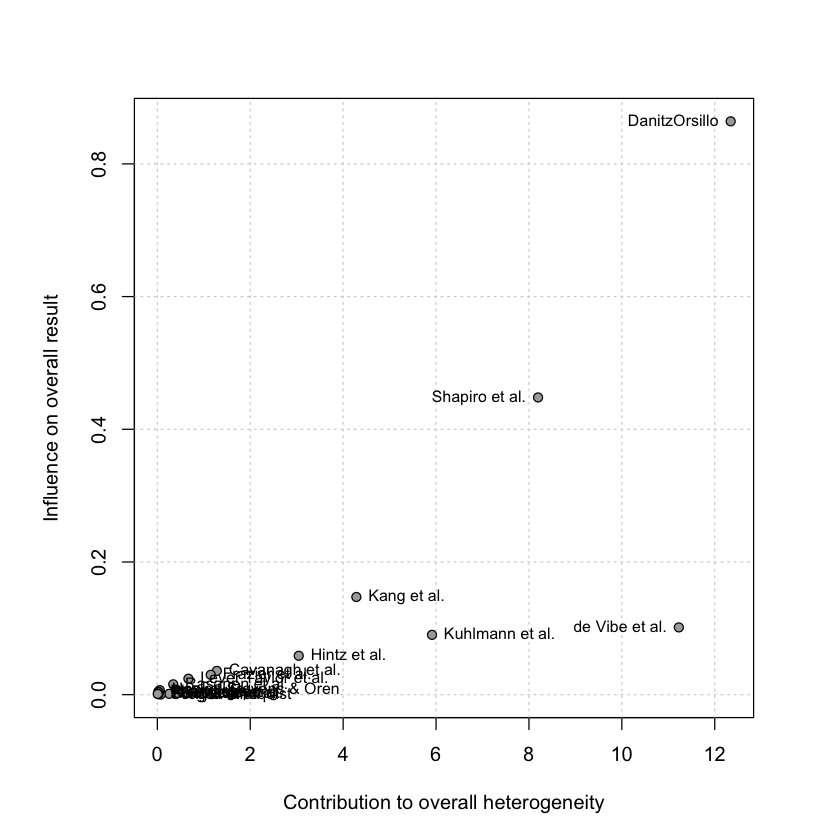

In [123]:
baujat(m_gen)

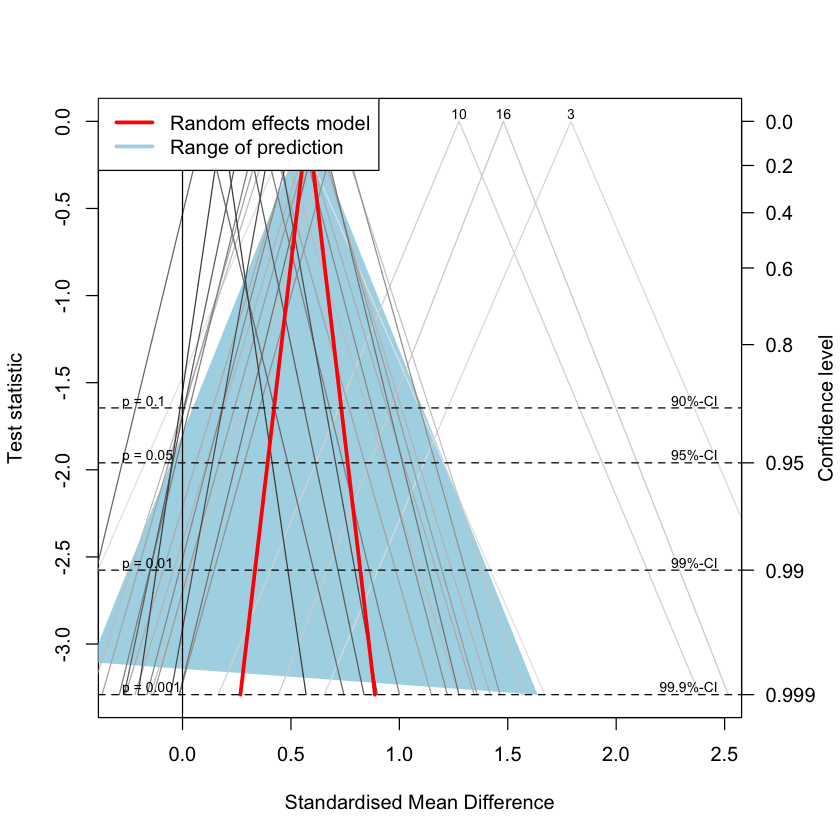

In [125]:
drapery(m_gen)

### 留一法

In [133]:
metainf(m_gen)

Review:     Third Wave

Influential analysis (random effects model (HK))

                                   SMD           95%-CI  p-value   tau^2
Omitting Call et al.            0.5736 [0.3616; 0.7855] < 0.0001  0.0902
Omitting Cavanagh et al.        0.5960 [0.3843; 0.8077] < 0.0001  0.0916
Omitting DanitzOrsillo          0.5074 [0.3486; 0.6663] < 0.0001  0.0354
Omitting de Vibe et al.         0.6077 [0.4040; 0.8114] < 0.0001  0.0738
Omitting Frazier et al.         0.5946 [0.3804; 0.8088] < 0.0001  0.0949
Omitting Frogeli et al.         0.5787 [0.3644; 0.7931] < 0.0001  0.0941
Omitting Gallego et al.         0.5718 [0.3593; 0.7843] < 0.0001  0.0904
Omitting Hazlett-Stevens & Oren 0.5855 [0.3714; 0.7996] < 0.0001  0.0946
Omitting Hintz et al.           0.6011 [0.3914; 0.8108] < 0.0001  0.0878
Omitting Kang et al.            0.5421 [0.3489; 0.7354] < 0.0001  0.0655
Omitting Kuhlmann et al.        0.6055 [0.4048; 0.8063] < 0.0001  0.0746
Omitting Lever Taylor et al.    0.5926 [0.3807; 0.

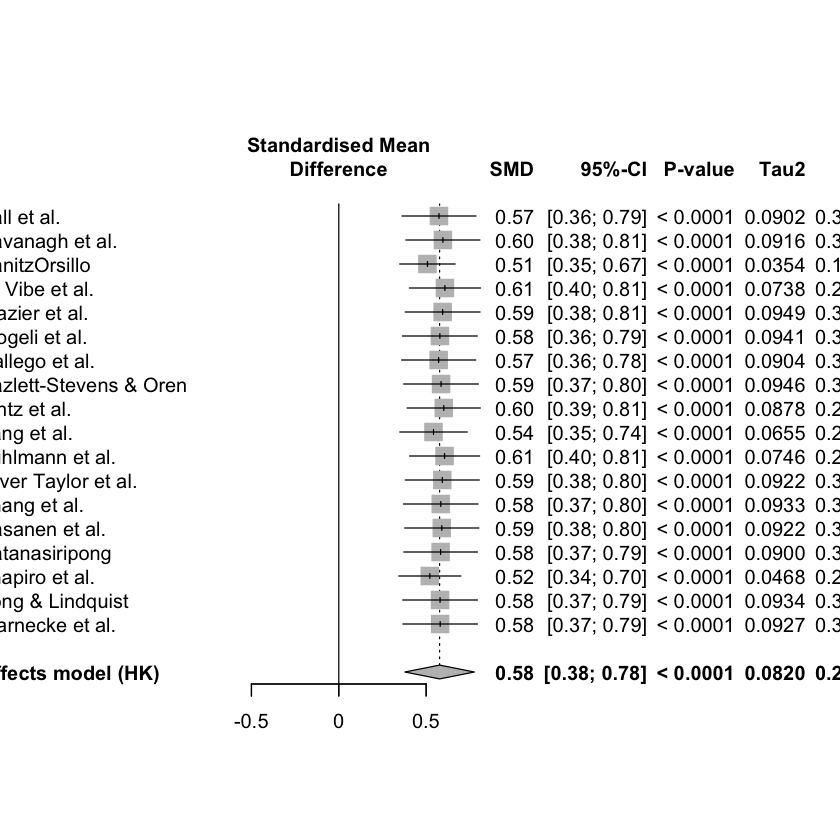

In [134]:
plot(metainf(m_gen))

### GOSH Plot

In [6]:
library(metafor)

# 先将 meta 对象转化为 metafor 对象
m_rma <- rma(
  yi = m_gen$TE,
  sei = m_gen$seTE,
  method = m_gen$method.tau,
  test = "knha"
)

Loading required package: Matrix

Loading required package: numDeriv


Loading the 'metafor' package (version 4.8-0). For an
introduction to the package please type: help(metafor)




In [7]:
# 绘制图形
res_gosh  <- gosh(m_rma)
plot(res_gosh, alpha = 0.01) # alpha设置透明度，1表示完全不透明

Fitting 262143 models (based on all possible subsets).



# 森林图

## 森林图

In [8]:
library(meta)
load("dmatar_data/ThirdWave.rda")

In [9]:
m_gen <- metagen(
  TE = TE,
  seTE = seTE,
  studlab = Author,
  data = ThirdWave,
  sm = "SMD",
  common = FALSE,
  random = TRUE,
  method.tau = "REML",
  method.random.ci = TRUE,
  title = "Third Wave"
)

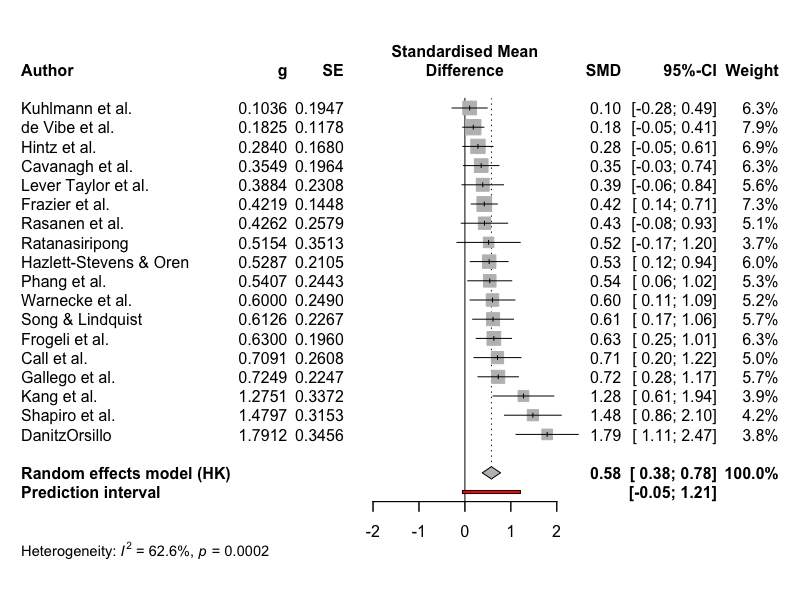

In [10]:
forest(
  m_gen,
  sortvar = TE,
  prediction = TRUE,
  print.tau2 = FALSE,
  leftlabs = c("Author", "g", "SE")
)

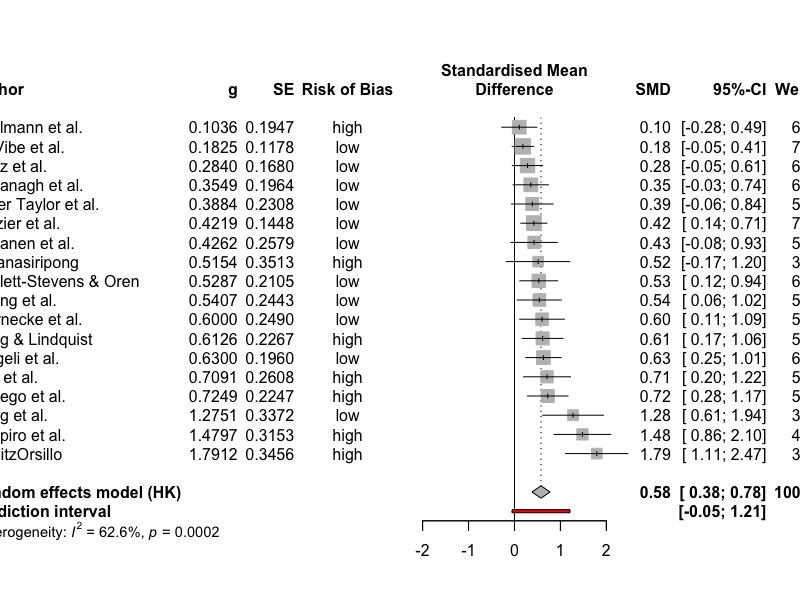

In [12]:
forest(
  m_gen,
  sortvar = TE,
  prediction = TRUE,
  print.tau2 = FALSE,
  leftcols = c("studlab", "TE", "seTE", "RiskOfBias"),
  leftlabs = c("Author", "g", "SE", "Risk of Bias")
)

In [13]:
labels(m_gen)

expression("Call et al."^1L, "Cavanagh et al."^2L, "DanitzOrsillo"^3L, 
    "de Vibe et al."^4L, "Frazier et al."^5L, "Frogeli et al."^6L, 
    "Gallego et al."^7L, "Hazlett-Stevens & Oren"^8L, "Hintz et al."^9L, 
    "Kang et al."^10L, "Kuhlmann et al."^11L, "Lever Taylor et al."^12L, 
    "Phang et al."^13L, "Rasanen et al."^14L, "Ratanasiripong"^15L, 
    "Shapiro et al."^16L, "Song & Lindquist"^17L, "Warnecke et al."^18L)

## 帷幔图

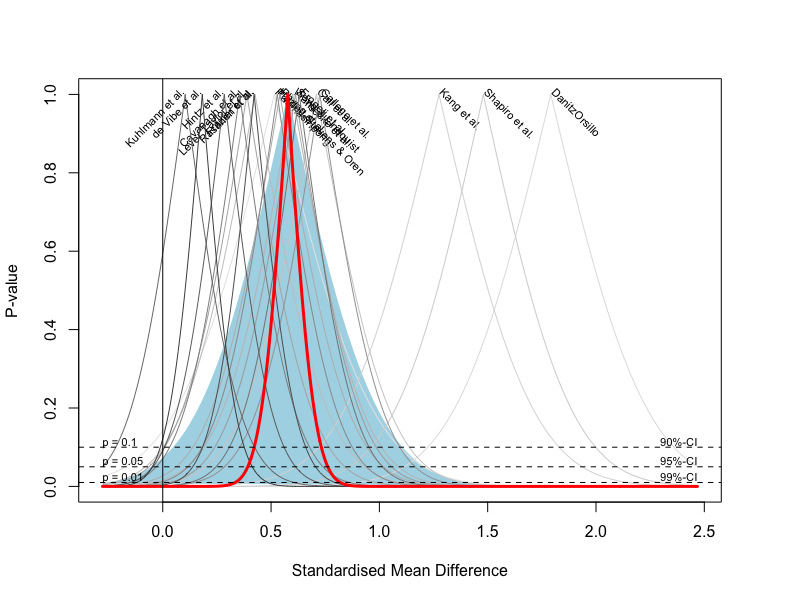

In [14]:
# 绘制帷幔图
drapery(
  m_gen,
  labels = "studlab",
  type = "pval",
  legend = FALSE
)


# 亚组分析

In [15]:
library(meta)
load("dmatar_data/ThirdWave.rda")

In [16]:
ThirdWave

                   Author        TE      seTE RiskOfBias TypeControlGroup InterventionDuration InterventionType
1             Call et al. 0.7091362 0.2608202       high              WLC                short      mindfulness
2         Cavanagh et al. 0.3548641 0.1963624        low              WLC                short      mindfulness
3           DanitzOrsillo 1.7911700 0.3455692       high              WLC                short              ACT
4          de Vibe et al. 0.1824552 0.1177874        low  no intervention                short      mindfulness
5          Frazier et al. 0.4218509 0.1448128        low information only                short              PCI
6          Frogeli et al. 0.6300000 0.1960000        low  no intervention                short              ACT
7          Gallego et al. 0.7248838 0.2246641       high  no intervention                 long      mindfulness
8  Hazlett-Stevens & Oren 0.5286638 0.2104609        low  no intervention                 long      mind

In [17]:
m_gen <- metagen(
  TE = TE,
  seTE = seTE,
  studlab = Author,
  data = ThirdWave,
  sm = "SMD",
  common = FALSE,
  random = TRUE,
  method.tau = "REML",
  method.random.ci = TRUE,
  title = "Third Wave",
  subgroup = RiskOfBias
)

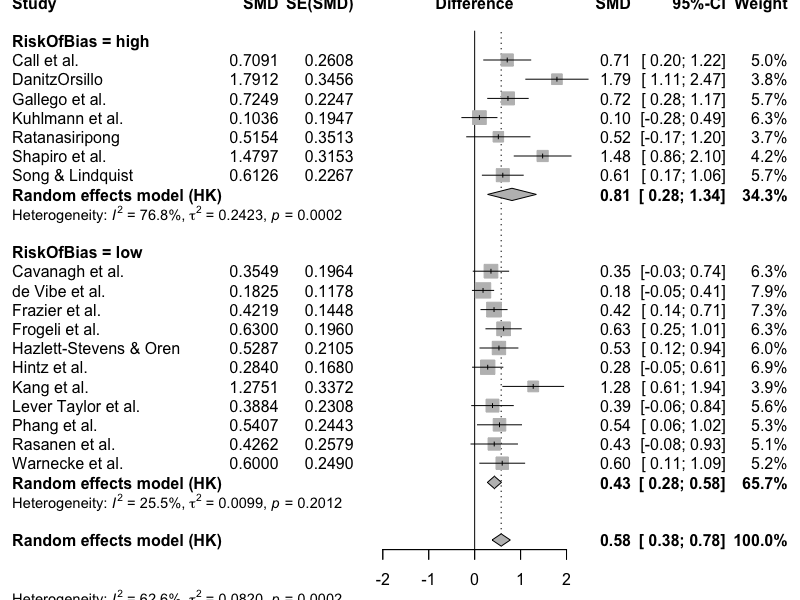

In [18]:
forest(m_gen)

# 发表偏倚

## 漏斗图

In [19]:
install.packages("metasens")

In [20]:
library(meta)
load("dmatar_data/ThirdWave.rda")

In [21]:
m_gen <- metagen(
  TE = TE,
  seTE = seTE,
  studlab = Author,
  data = ThirdWave,
  sm = "SMD",
  common = FALSE,
  random = TRUE,
  method.tau = "REML",
  method.random.ci = TRUE,
  title = "Third Wave"
)

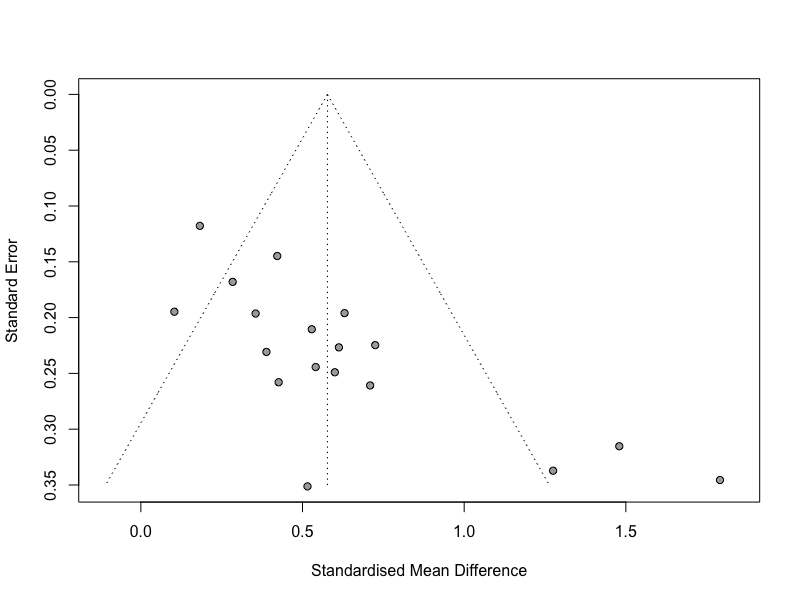

In [22]:
funnel(m_gen)

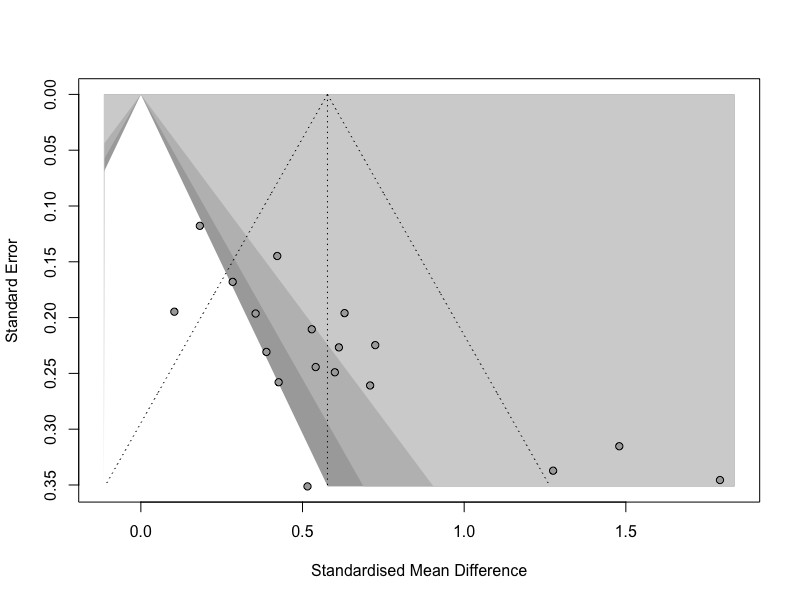

In [23]:
funnel(
  m_gen,
  contour.levels = c(0.9, 0.95, 0.99),
  col.contour = c("darkgray", "gray", "lightgray")
)

## 统计检验

In [24]:
metabias(m_gen, method.bias = "egger")

Review:     Third Wave

Linear regression test of funnel plot asymmetry

Test result: t = 4.68, df = 16, p-value = 0.0003
Bias estimate: 4.1111 (SE = 0.8790)

Details:
- multiplicative residual heterogeneity variance (tau^2 = 1.2014)
- predictor: standard error
- weight:    inverse variance
- reference: Egger et al. (1997), BMJ

## 剪补法（trim-and-fill method）

In [25]:
m_gen_trim <- trimfill(m_gen)
summary(m_gen_trim)

Review:     Third Wave

                             SMD             95%-CI %W(random)
Call et al.               0.7091 [ 0.1979;  1.2203]        3.8
Cavanagh et al.           0.3549 [-0.0300;  0.7397]        4.2
DanitzOrsillo             1.7912 [ 1.1139;  2.4685]        3.3
de Vibe et al.            0.1825 [-0.0484;  0.4133]        4.5
Frazier et al.            0.4219 [ 0.1380;  0.7057]        4.4
Frogeli et al.            0.6300 [ 0.2458;  1.0142]        4.2
Gallego et al.            0.7249 [ 0.2846;  1.1652]        4.0
Hazlett-Stevens & Oren    0.5287 [ 0.1162;  0.9412]        4.1
Hintz et al.              0.2840 [-0.0453;  0.6133]        4.3
Kang et al.               1.2751 [ 0.6142;  1.9360]        3.3
Kuhlmann et al.           0.1036 [-0.2781;  0.4853]        4.2
Lever Taylor et al.       0.3884 [-0.0639;  0.8407]        4.0
Phang et al.              0.5407 [ 0.0619;  1.0196]        3.9
Rasanen et al.            0.4262 [-0.0794;  0.9317]        3.8
Ratanasiripong            0.515

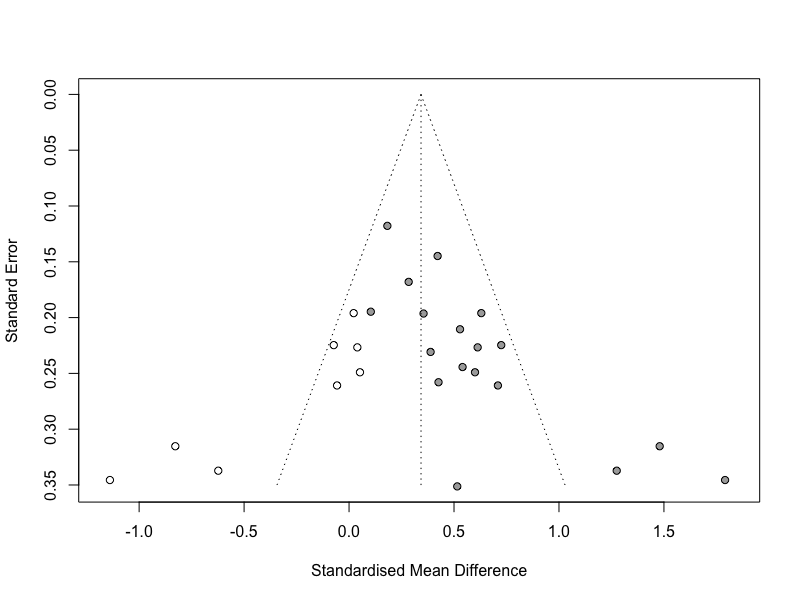

In [26]:
funnel(m_gen_trim)

## limit meta-analysis

In [27]:
library(metasens)
m_gen_limit <- limitmeta(m_gen)
summary(m_gen_limit)

Loading 'metasens' package (version 1.5-2).
Readers of 'Meta-Analysis with R (Use R!)' should install
older version of 'metasens' package: https://tinyurl.com/jhv33bfm


Results for individual studies
(left: original data; right: shrunken estimates)

                            SMD            95%-CI        SMD            95%-CI
Call et al.              0.7091 [ 0.1979; 1.2203]    -0.0531 [-0.5643; 0.4581]
Cavanagh et al.          0.3549 [-0.0300; 0.7397]    -0.0955 [-0.4804; 0.2893]
DanitzOrsillo            1.7912 [ 1.1139; 2.4685]     0.3412 [-0.3361; 1.0185]
de Vibe et al.           0.1825 [-0.0484; 0.4133]     0.0022 [-0.2286; 0.2331]
Frazier et al.           0.4219 [ 0.1380; 0.7057]     0.1381 [-0.1457; 0.4219]
Frogeli et al.           0.6300 [ 0.2458; 1.0142]     0.1328 [-0.2514; 0.5169]
Gallego et al.           0.7249 [ 0.2846; 1.1652]     0.0980 [-0.3423; 0.5384]
Hazlett-Stevens & Oren   0.5287 [ 0.1162; 0.9412]    -0.0042 [-0.4167; 0.4083]
Hintz et al.             0.2840 [-0.0453; 0.6133]    -0.0595 [-0.3888; 0.2697]
Kang et al.              1.2751 [ 0.6142; 1.9360]     0.0442 [-0.6167; 0.7051]
Kuhlmann et al.          0.1036 [-0.2781; 0.4853] 

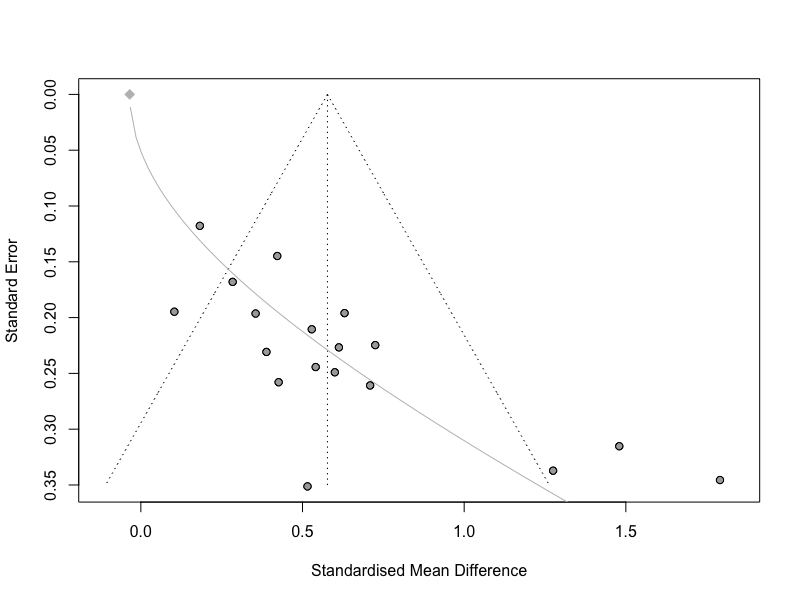

In [28]:
funnel(m_gen_limit)

# Meta回归

In [29]:
ThirdWave

                   Author        TE      seTE RiskOfBias TypeControlGroup InterventionDuration InterventionType
1             Call et al. 0.7091362 0.2608202       high              WLC                short      mindfulness
2         Cavanagh et al. 0.3548641 0.1963624        low              WLC                short      mindfulness
3           DanitzOrsillo 1.7911700 0.3455692       high              WLC                short              ACT
4          de Vibe et al. 0.1824552 0.1177874        low  no intervention                short      mindfulness
5          Frazier et al. 0.4218509 0.1448128        low information only                short              PCI
6          Frogeli et al. 0.6300000 0.1960000        low  no intervention                short              ACT
7          Gallego et al. 0.7248838 0.2246641       high  no intervention                 long      mindfulness
8  Hazlett-Stevens & Oren 0.5286638 0.2104609        low  no intervention                 long      mind

In [30]:
metareg(m_gen, ~RiskOfBias)


Mixed-Effects Model (k = 18; tau^2 estimator: REML)

tau^2 (estimated amount of residual heterogeneity):     0.0691 (SE = 0.0424)
tau (square root of estimated tau^2 value):             0.2630
I^2 (residual heterogeneity / unaccounted variability): 60.58%
H^2 (unaccounted variability / sampling variability):   2.54
R^2 (amount of heterogeneity accounted for):            15.66%

Test for Residual Heterogeneity:
QE(df = 16) = 39.3084, p-val = 0.0010

Test of Moderators (coefficient 2):
F(df1 = 1, df2 = 16) = 2.5066, p-val = 0.1329

Model Results:

               estimate      se     tval  df    pval    ci.lb   ci.ub      
intrcpt          0.7691  0.1537   5.0022  16  0.0001   0.4431  1.0950  *** 
RiskOfBiaslow   -0.2992  0.1890  -1.5832  16  0.1329  -0.6999  0.1014      

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


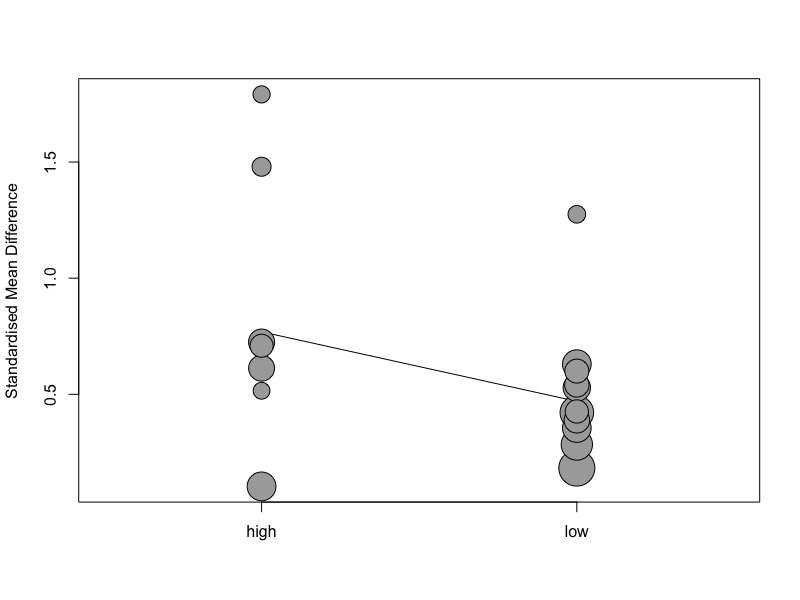

In [31]:
m_gen_reg <- metareg(m_gen, ~RiskOfBias)
bubble(m_gen_reg)